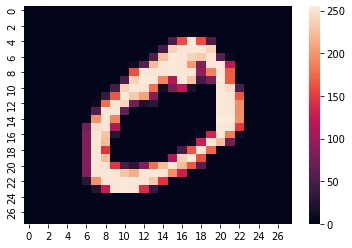

Epoch 1/30
938/938 [==============================] - 5s 5ms/step - loss: 0.5516 - accuracy: 0.8339 - val_loss: 0.2837 - val_accuracy: 0.9152
Epoch 2/30
938/938 [==============================] - 4s 4ms/step - loss: 0.2551 - accuracy: 0.9249 - val_loss: 0.2116 - val_accuracy: 0.9388
Epoch 3/30
938/938 [==============================] - 4s 4ms/step - loss: 0.2071 - accuracy: 0.9399 - val_loss: 0.1894 - val_accuracy: 0.9434
Epoch 4/30
938/938 [==============================] - 4s 5ms/step - loss: 0.1800 - accuracy: 0.9477 - val_loss: 0.1653 - val_accuracy: 0.9502
Epoch 5/30
938/938 [==============================] - 5s 5ms/step - loss: 0.1617 - accuracy: 0.9525 - val_loss: 0.1413 - val_accuracy: 0.9590
Epoch 6/30
938/938 [==============================] - 4s 5ms/step - loss: 0.1476 - accuracy: 0.9556 - val_loss: 0.1226 - val_accuracy: 0.9639
Epoch 7/30
938/938 [==============================] - 4s 4ms/step - loss: 0.1368 - accuracy: 0.9592 - val_loss: 0.1285 - val_accuracy: 0.9615
Epoch 

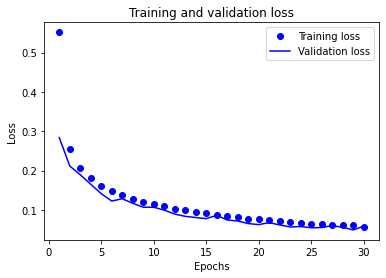

In [72]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import optimizers

# Loads the data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Plots a single digit from the data

sns.heatmap(train_data[1, :, :])

plt.show()

train_data = train_data.reshape((60000, 28*28))/255
test_data = test_data.reshape((10000, 28*28))
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)



model = tf.keras.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(784,), use_bias=True, bias_regularizer='L2'))
model.add(layers.Dense(20, activation='relu',use_bias=True, bias_regularizer='L2'))
model.add(layers.Dense(20, activation='relu',use_bias=True, bias_regularizer='L2'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_data, train_labels, epochs = 30, batch_size = 64, validation_data=(train_data, train_labels))

history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

#’bo’ is for blue dot, ‘b’ is for solid blue line
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [73]:
# loss: 0.0568 - accuracy: 0.9822 - val_loss: 0.0587 - val_accuracy: 0.9807